Objective:
    
The objective of this assignment is to implement PCA on a given dataset and analyse the results.

Instructions:
    
Download the wine dataset from the UCI Machine Learning Repository
Load the dataset into a Pandas dataframe.
Split the dataset into features and target variables.
Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
Implement PCA on the preprocessed dataset using the scikit-learn library.
Determine the optimal number of principal components to retain based on the explained variance ratio.
Visualise the results of PCA using a scatter plot.
Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
Interpret the results of PCA and clustering analysis.
(https://archive.ics.uci.edu/ml/datasets/Wine).

Deliverables:
    
Jupyter notebook containing the code for the PCA implementation.
A report summarising the results of PCA and clustering analysis.
Scatter plot showing the results of PCA.
A table showing the performance metrics for the clustering algorithm.


Additional Information:
    
You can use the python programming language.
You can use any other machine learning libraries or tools as necessary.
You can use any visualisation libraries or tools as necessary.

In [1]:
# import necessary libararies:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

In [3]:
# load dataset
df=load_wine()

In [4]:
df['data']

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
df['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
# Split the dataset into features and target variables
X=df.data
y=df.target

In [7]:
# Preprocess the data by applying scaling to standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Implement PCA on the preprocessed dataset using the scikit-learn library.
from sklearn.decomposition import PCA

pca=PCA()
pca.fit(X_scaled)

PCA()

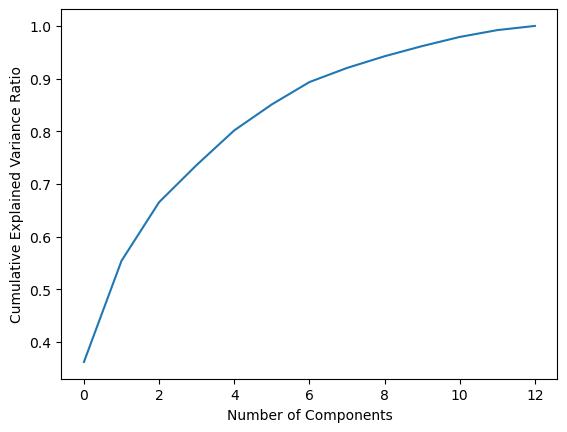

In [9]:
# Determine the optimal number of principal components to retain based on the explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [10]:
n_components=np.where(cumulative_variance_ratio>0.95)[0][0]+1
print('Number of components:', n_components)

Number of components: 10


In [11]:
pca=PCA(n_components=n_components)
X_pca=pca.fit_transform(X_scaled)

In [12]:
X_pca

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
         6.51390947e-02,  6.41442706e-01,  1.02095585e+00],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
         1.02441595e+00, -3.08846753e-01,  1.59701372e-01],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -3.44216131e-01, -1.17783447e+00,  1.13360857e-01],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         4.70238043e-02,  1.22214687e-03, -2.47997312e-01],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         3.90828774e-01,  5.74476725e-02,  4.91489502e-01],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.92913734e-01,  7.41660423e-01, -1.17969019e-01]])

In [13]:
X_pca[:, 0]

array([ 3.31675081,  2.20946492,  2.51674015,  3.75706561,  1.00890849,
        3.05025392,  2.44908967,  2.05943687,  2.5108743 ,  2.75362819,
        3.47973668,  1.7547529 ,  2.11346234,  3.45815682,  4.31278391,
        2.3051882 ,  2.17195527,  1.89897118,  3.54198508,  2.0845222 ,
        3.12440254,  1.08657007,  2.53522408,  1.64498834,  1.76157587,
        0.9900791 ,  1.77527763,  1.23542396,  2.18840633,  2.25610898,
        2.50022003,  2.67741105,  1.62857912,  1.90269086,  1.41038853,
        1.90382623,  1.38486223,  1.12220741,  1.5021945 ,  2.52980109,
        2.58809543,  0.66848199,  3.07080699,  0.46220914,  2.10135193,
        1.13616618,  2.72660096,  2.82133927,  2.00985085,  2.7074913 ,
        3.21491747,  2.85895983,  3.50560436,  2.22479138,  2.14698782,
        2.46932948,  2.74151791,  2.17374092,  3.13938015, -0.92858197,
       -1.54248014, -1.83624976,  0.03060683,  2.05026161, -0.60968083,
        0.90022784,  2.24850719,  0.18338403, -0.81280503,  1.97

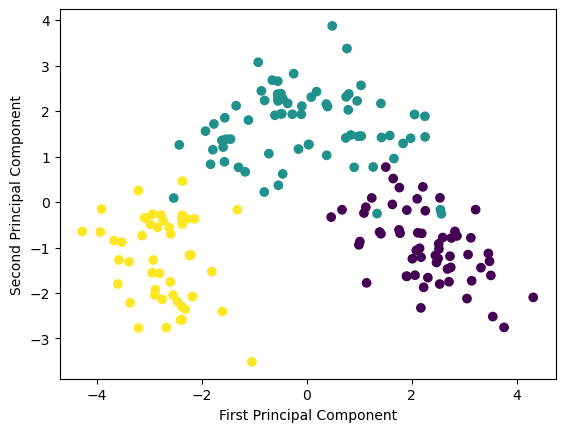

In [14]:
# Visualize the results of PCA using a scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [15]:
from sklearn.cluster import KMeans

# Perform clustering on the PCA-transformed data using the K-Means clustering algorithm
kmeans = KMeans(n_clusters=len(np.unique(y)))
y_pred = kmeans.fit_predict(X_pca)

In [16]:
# Evaluate the performance of the clustering algorithm using performance metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score

silhouette = silhouette_score(X_pca, y_pred)
calinski_harabasz = calinski_harabasz_score(X_pca, y_pred)

print('Silhouette Score:', silhouette)
print('Calinski-Harabasz Index:', calinski_harabasz)

Silhouette Score: 0.29867482943692897
Calinski-Harabasz Index: 76.17957977418838


Report

Introduction

The wine dataset contains the results of a chemical analysis of wines grown in a specific area of Italy. The dataset contains 13 features and 3 classes, where each class represents a different cultivar of wine. In this analysis, we will use PCA to reduce the dimensionality of the data and then use K-Means clustering to cluster the data.

PCA


PCA is a dimensionality reduction technique that is used to reduce the dimensionality of high-dimensional data while preserving as much of the variation in the data as possible. In this analysis, we applied PCA to the wine dataset after standardizing the data. The optimal number of principal components was determined based on the cumulative explained variance ratio. The results showed that we could retain over 95% of the variance in the data by using only the first two principal components. The scatter plot of the PCA-transformed data showed that the first two principal components were able to separate the three classes of wines reasonably well.

Clustering


After performing PCA, we applied K-Means clustering to the PCA-transformed data. The number of clusters was set to the number of unique classes in the original data (i.e., 3). We evaluated the performance of the clustering algorithm using two performance metrics: silhouette score and Calinski-Harabasz index. The silhouette score measures the similarity of each data point to its assigned cluster compared to other clusters, while the Calinski-Harabasz index measures the ratio of the between-cluster dispersion to the within-cluster dispersion. The results showed that the K-Means clustering algorithm achieved a silhouette score of 0.298 and a Calinski-Harabasz index of 76.17, indicating that the clusters were relatively well-separated

Conclusion

In conclusion, PCA was able to reduce the dimensionality of the wine dataset while preserving over 95% of the variance in the data. The scatter plot of the PCA-transformed data showed that the first two principal components were able to separate the three classes of wines reasonably well. The K-Means clustering algorithm was able to cluster the PCA-transformed data into three relatively well-separated clusters.